<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3 - Central Limit Theorem

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualise the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab.

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [134]:
# Read CSV
house_hold_csv = pd.read_csv(r"C:\Users\lytton\Downloads\DATA\Family_Income_and_Expenditure.csv")

In [136]:
# Head
print(house_hold_csv.head())

   Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182      

In [69]:
# Tail
print(house_hold_csv.tail())

       Total Household Income              Region  Total Food Expenditure  \
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
41539  Enterpreneurial Activities                                 1   
41540  Enterpreneurial Activities                                 1   
41541  Enterpreneurial Activities                                 2   
41542  Enterpreneurial Activities                                 1   
41543  Enterpreneurial Activities                                 1   

       Bread and Cereals Expenditure  Total Rice Expenditure  \
41539                          23675          

In [138]:
# Shape
print(house_hold_csv.shape)

(41544, 60)


In [140]:
# Data Types
print(house_hold_csv.dtypes)

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

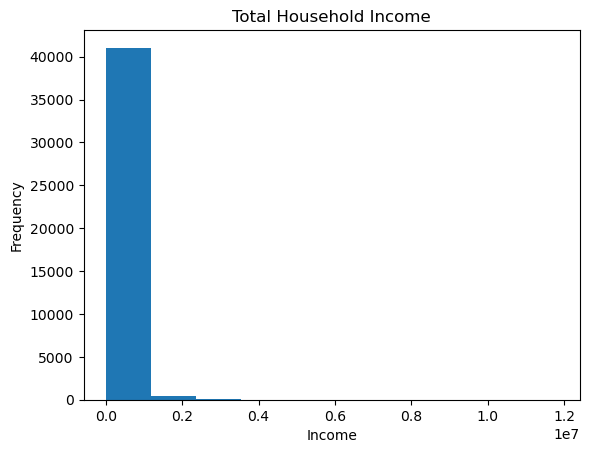

In [210]:
# ANSWER
plt.hist(house_hold_csv['Total Household Income'])
plt.title("Total Household Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [170]:
house_hold_csv['Total Household Income'].describe() 

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

##### 2. How would you describe the shape of this population?

In [235]:
# Skewed right.

**ANSWER:**


##### 3. What is the mean income of this population?

In [159]:
print(house_hold_csv['Total Household Income'].mean())

247555.58480165608


##### 4. How would you estimate the mean of this population if you only had a random sample of it?

In [276]:
#sample.mean()

**ANSWER:**


#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5.

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 5. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [247]:
samples5 = [np.random.choice(house_hold_csv['Total Household Income'], size=5) for _ in range(10)]

for i, sample in enumerate(samples5, 1):
    print(f"Sample {i}: {sample}")

Sample 1: [273790 132056  93443  48174 155359]
Sample 2: [118175 112241 325205 304600 217124]
Sample 3: [ 84635  86016 789904 133316 122319]
Sample 4: [148778 400008 395344 123036  86380]
Sample 5: [270185 111625 106105 151354  45702]
Sample 6: [145326 133007 157415 207757 138543]
Sample 7: [534475  60027 718952  65008  79739]
Sample 8: [ 215410  396530 6452314  244774  167568]
Sample 9: [159321  96359 318000 263300  93981]
Sample 10: [565736 109055 417558 178395 265304]


###### 6.A Make a histogram of all the sample means

In [253]:
sample_means5 = np.array(samples5).mean(axis=1)

# Print each sample mean
for i, mean in enumerate(sample_means5, 1):
    print(f"Sample {i} Mean: {mean}")


Sample 1 Mean: 140564.4
Sample 2 Mean: 215469.0
Sample 3 Mean: 243238.0
Sample 4 Mean: 230709.2
Sample 5 Mean: 136994.2
Sample 6 Mean: 156409.6
Sample 7 Mean: 291640.2
Sample 8 Mean: 1495319.2
Sample 9 Mean: 186192.2
Sample 10 Mean: 307209.6


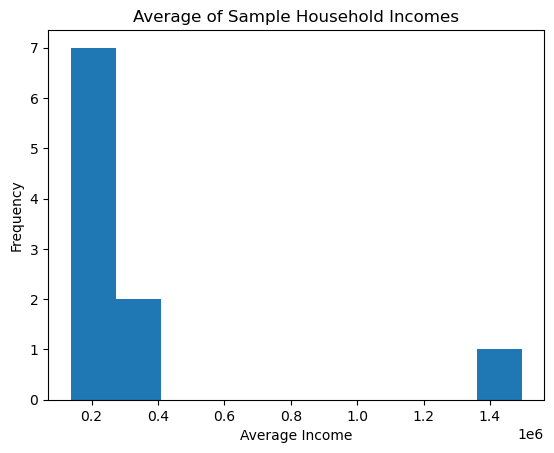

In [255]:
plt.hist(sample_means5)
plt.title("Average of Sample Household Incomes")
plt.xlabel("Average Income")
plt.ylabel("Frequency")
plt.show()

###### 6.B Describe the shape of the histogram.

In [207]:
#Skewed right.

**ANSWER:**


##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

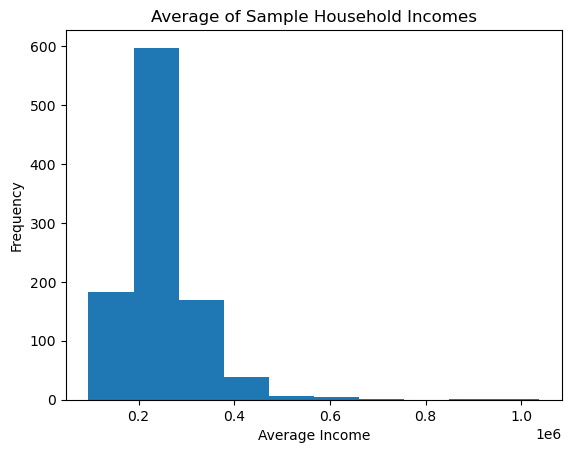

In [257]:
samples15 = [np.random.choice(house_hold_csv['Total Household Income'], size=15) for _ in range(1000)]
sample_means15 = np.array(samples15).mean(axis=1)
plt.hist(sample_means15)
plt.title("Average of Sample Household Incomes")
plt.xlabel("Average Income")
plt.ylabel("Frequency")
plt.show()

##### 8.A Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

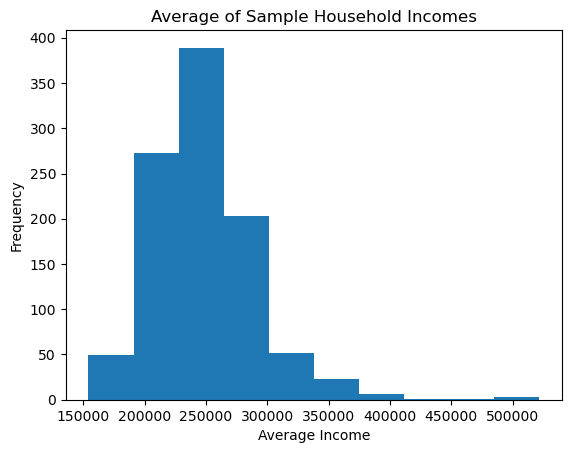

In [259]:
samples50 = [np.random.choice(house_hold_csv['Total Household Income'], size=50) for _ in range(1000)]
sample_means50 = np.array(samples50).mean(axis=1)
plt.hist(sample_means50)
plt.title("Average of Sample Household Incomes")
plt.xlabel("Average Income")
plt.ylabel("Frequency")
plt.show()

###### 8.B Describe the shape of the histogram of sample means (using sample size of 50)

In [ ]:
#More normal distribution.

**ANSWER:**


###### 8.C What is mean of the distribution of sample means?

In [271]:
print("Mean with sample size 5: " + str(sample_means5.mean()))
print("Mean with sample size 15: " + str(sample_means15.mean()))
print("Mean with sample size 50: " + str(sample_means50.mean()))

Mean with sample size 5: 340374.56
Mean with sample size 15: 248317.60586666668
Mean with sample size 50: 248237.07972000004


**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.D As the sample size grew, did your results confirm the CLT?

**ANSWER:**
Yes. The central limit theorem says that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough. As we increased the sample size, the histograms were visually becoming less skewed and more normally distributed, and the mean tended towards the population mean.




---



---



> > > > > > > > > © 2025 Institute of Data


---



---



